In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer #在preprocessing中有个类似的imputer（弃用）
from scipy import stats

NaN = np.nan

In [2]:
# 数据处理包括数据清洗，数据标准化，数据离散化，数据降维等

In [3]:
# 数据清洗是指对于不符合要求，不能直接进行相应分析的数据进行处理
# 1.处理缺失值（识别，删除，填充）
df = pd.DataFrame([[1, 2, 3],
                   [NaN, NaN, 2],
                   [NaN, NaN, NaN],
                   [14, 14, NaN]])
# any() 函数用于判断给定的可迭代参数 iterable 是否全部为 False，则返回 False，如果有一个为 True，则返回 True。
print('数据集中是否存在缺失值:{}\n'.format(any(df.isnull())))
print('df:\n{}\n'.format(df))
print('df1:\n{}\n'.format(df.dropna()))  # 删除缺失值
print('df2:\n{}\n'.format(df.fillna(100)))  # 填充方法有平均（中位）值，固定值和最近值
imp = SimpleImputer(missing_values=NaN, strategy="mean")  # 1.创建imputer（归咎）
df[0] = imp.fit_transform(df[[0]])  # df[0]是series，而df[[0]]是dataframe
print('df3:\n{}\n'.format(df))


数据集中是否存在缺失值:True

df:
      0     1    2
0   1.0   2.0  3.0
1   NaN   NaN  2.0
2   NaN   NaN  NaN
3  14.0  14.0  NaN

df1:
     0    1    2
0  1.0  2.0  3.0

df2:
       0      1      2
0    1.0    2.0    3.0
1  100.0  100.0    2.0
2  100.0  100.0  100.0
3   14.0   14.0  100.0

df3:
      0     1    2
0   1.0   2.0  3.0
1   7.5   NaN  2.0
2   7.5   NaN  NaN
3  14.0  14.0  NaN



<AxesSubplot: >

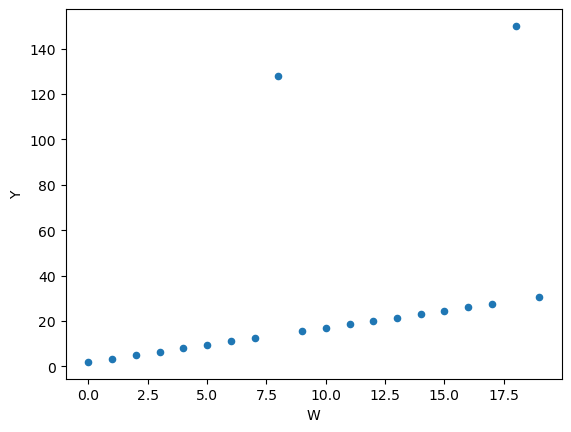

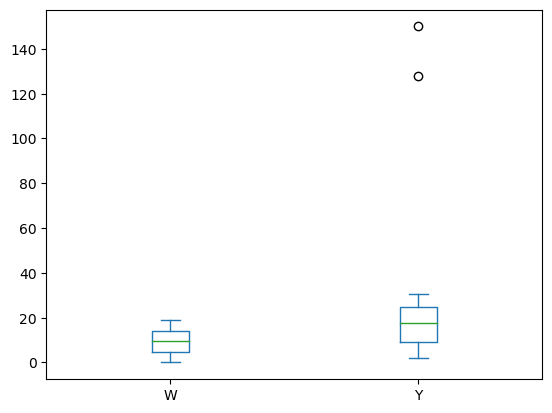

In [4]:

# 2.处理异常值（离群点或噪声数据，是指不合常理的数据）（散点，箱线, 拉依达）
wdf = pd.DataFrame(np.arange(20), columns=['W'])
wdf['Y'] = wdf['W']*1.5+2
wdf.iloc[8, 1] = 128  # iloc全称index location，通过索引获取元素的位置
wdf.iloc[18, 1] = 150
wdf.plot(kind='scatter', x='W', y='Y')
wdf.plot(kind='box')


In [5]:

data = [1222, 87, 77, 92, 68, 75, 77, 80, 78, 128, 8, 28, 82]
df = pd.DataFrame(data, columns=['value'])
u = df['value'].mean()
std = df['value'].std()
print(stats.kstest(df, 'norm', (u, std)))
# 3.处理重复值（）


KstestResult(statistic=0.999541060179523, pvalue=8.014097728567722e-44)


In [6]:
# 数据标准化是指将数据缩放到同一特定的区间，如归一化和标准化


In [7]:
# 数据离散化是指对连续型的特征数据（时间序列）进行区间划分


In [8]:
# 数据降维是指对输入数据的特征进行线性相关性处理，减少数据维度
